# Stock Price Prediction Model

In [1]:
# Import Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm
%matplotlib inline 

In [2]:
# extract Data from yfinance

Ticker = 'GM'
start_date = '2020-3-7'
end_date = '2023-5-1'

stock_data = pd.DataFrame()
stock_data[Ticker] = yf.download (Ticker , start = start_date , end = end_date)['Adj Close'] 

[*********************100%***********************]  1 of 1 completed


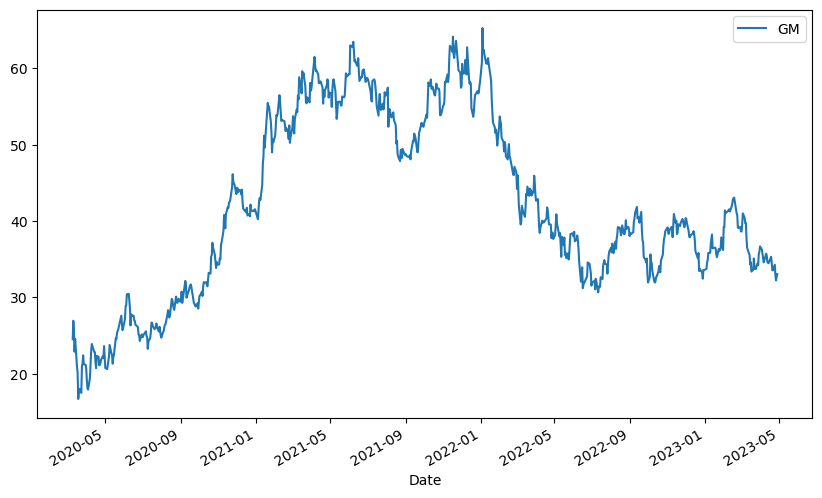

In [3]:
# plot GM Closing price 

stock_data.plot (figsize = (10,6));

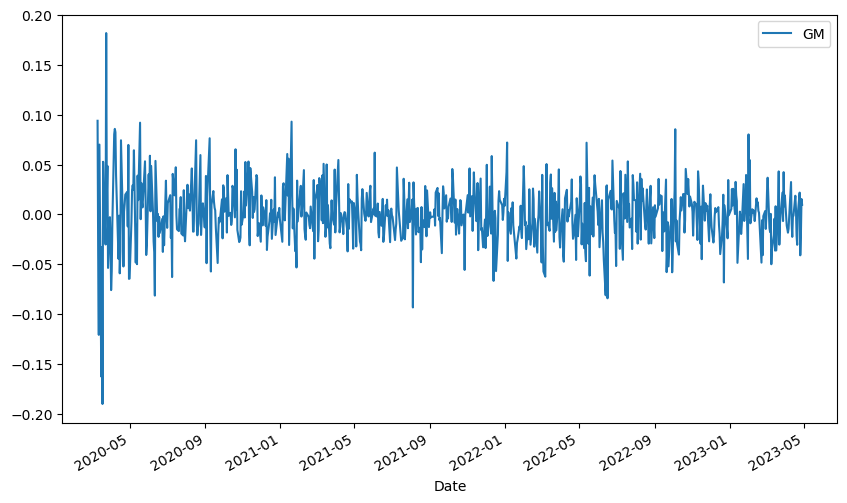

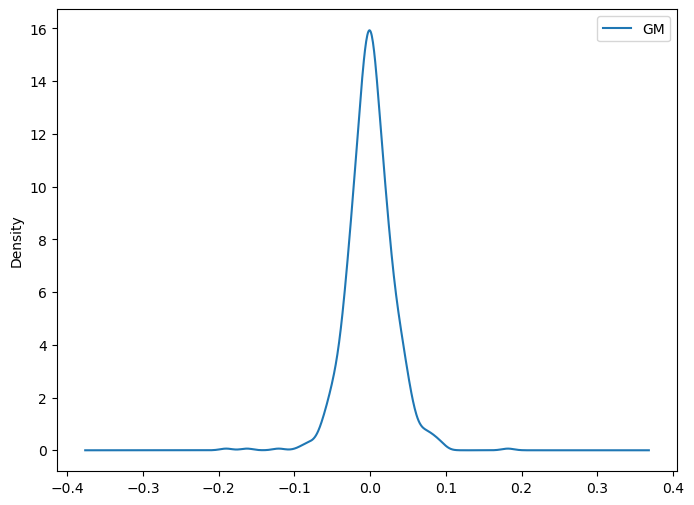

In [4]:
# Calculate Historical Log returns
log_returns = np.log(1+stock_data.pct_change())

# plot log return
log_returns.plot(figsize = (10,6));

# plot the distribution of log returns
log_returns.plot.density(figsize = (8,6));

In [5]:
# Calculate my statistic measures

mean = log_returns.mean()
var = log_returns.var()
std = log_returns.std()

In [6]:
# simulate future daily returns 
t_intervals = 250
simulations = 10000
daily_logreturn_simulated = std.values * norm.ppf(np.random.rand(t_intervals ,simulations ))

# undo log return to simple return
daily_simplereturn_simulated = np.exp(daily_logreturn_simulated)
daily_simplereturn_simulated.shape

(250, 10000)

In [7]:
# latest known stock price for Sap
last_price = stock_data.iloc[-1]

# prepare an array for price simulation
price_list = np.zeros_like (daily_simplereturn_simulated)

# classify the first row in the price list
price_list[0] = last_price

price_list

array([[33.04000092, 33.04000092, 33.04000092, ..., 33.04000092,
        33.04000092, 33.04000092],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

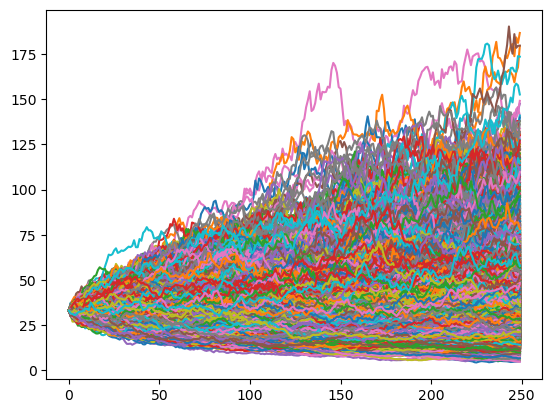

In [8]:
# apply a for loop for simulated prices 
for t in range (1 , t_intervals):
    price_list[t] = price_list[t-1] * daily_simplereturn_simulated[t]

# plot simulated future GM prices 
plt.plot (price_list);

## Including Drift 

In [9]:
# calculate drift 
drift = mean - (.5 * var)

# simulate future daily returns
t_intervals = 250
simulations = 10000

daily_logreturn_simulated = std.values * norm.ppf(np.random.rand(t_intervals,simulations) )
daily_logreturn_simulated_withdrift = daily_logreturn_simulated + drift.values
daily_simplereturn_simulated_withdrift = np.exp (daily_logreturn_simulated_withdrift)

daily_simplereturn_simulated_withdrift.shape

(250, 10000)

In [10]:
# latest known stock price for GM
last_price = stock_data.iloc[-1]

# prepare an array for price simulation
price_list = np.zeros_like (daily_simplereturn_simulated_withdrift)

# classify the first row in the price list
price_list[0] = last_price

price_list

array([[33.04000092, 33.04000092, 33.04000092, ..., 33.04000092,
        33.04000092, 33.04000092],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

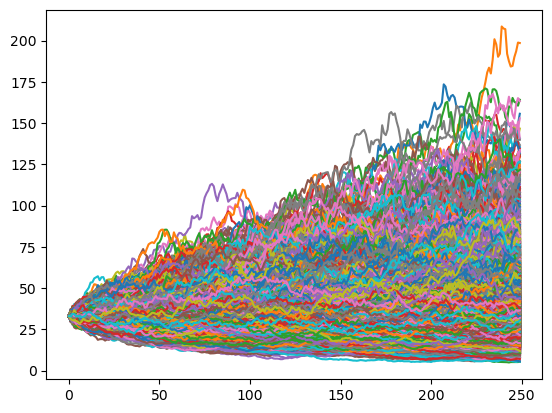

In [11]:
# apply a for loop for simulated prices 
for t in range (1 , t_intervals):
    price_list[t] = price_list[t-1] * daily_simplereturn_simulated_withdrift [t]

# plot simulated future GM prices 
plt.plot (price_list);

### Examine the worst, average, best scenarios and the probability distribution

In [12]:
# Calculate worst, avg and best scenarios
WorstSim = round(price_list[-1].min(),2)
AvgSim = round(price_list[-1].mean(),2)
BestSim = round(price_list[-1].max(),2)

# Examine the worst, average, and best stock price sceanrios
print("Best and Worst Cases")
print(f"Worst Simulation $/share: {WorstSim}")
print(f"Avg Simulation $/share: {AvgSim}")
print(f"Best Simulation $/share: {BestSim}")

# Set up confidence intervals
Mean_Day250Prices = price_list[-1].mean()
SD_Day250Prices = price_list[-1].std()
UpperInterval_1SD = Mean_Day250Prices + 1 * SD_Day250Prices 
LowerInterval_1SD = Mean_Day250Prices - 1 * SD_Day250Prices
UpperInterval_2SD = Mean_Day250Prices + 2 * SD_Day250Prices
LowerInterval_2SD = Mean_Day250Prices - 2 * SD_Day250Prices

# Print out the price range within the confidence intervals
print("\n" + "Confidence Intervals")
print(f"1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: ${LowerInterval_1SD} and ${round(UpperInterval_1SD,2)}")
print(f"2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: ${round(LowerInterval_2SD,2)} and ${round(UpperInterval_2SD,2)}")

Best and Worst Cases
Worst Simulation $/share: 5.39
Avg Simulation $/share: 36.42
Best Simulation $/share: 198.51

Confidence Intervals
1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: $17.96320445379592 and $54.88
2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: $-0.49 and $73.34


In [13]:
Mean_Day250Prices
SD_Day250Prices

18.458121831903544

In [14]:
Mean_Day250Prices

36.421326285699465